# Statistická úloha

Budeme zkoumat souvislosti mezi štěstí populace země a gramotnosti v populace země na těchto datech:

- [World Happiness Report](https://www.kaggle.com/datasets/unsdsn/world-happiness?resource=download)
- [Countries of the World](https://www.kaggle.com/datasets/fernandol/countries-of-the-world)

Naše nulová hypotéza je, že pomocí gramotnosti populace nelze ani částečně odhadnout štěstí populace.

## Import dat a normalizace


In [13]:
import numpy as np
import pandas as pd
import pycountry

def standardize_country_name(country_name):
    """
    Try fuzzy matching against a DB of country names.
    Otherwise at least trim whitespace.
    """
    try: 
        return pycountry.countries.search_fuzzy(country_name)[0].name
    except LookupError:
        return country_name.strip()
    

literacy = pd.read_csv(
    './data/countries_of_the_world/countries_of_the_world.csv',
    dtype={"Literacy (%)": np.float16}, 
    decimal=','
)
literacy["Country"] = \
    literacy["Country"].apply(standardize_country_name)

happiness = pd.read_csv(
    './data/world_happiness/2019.csv',
    dtype={
        "Score": np.float16
        }
    )
happiness["Country or region"] = \
    happiness["Country or region"].apply(standardize_country_name)

## Sloučení tabulek


In [14]:
merged = pd.merge(
    literacy, 
    happiness, 
    how="inner", 
    left_on="Country", 
    right_on="Country or region"
    )
# if happiness score or literacy is unknown, ignore country
filtered = \
    merged[~np.isnan(merged["Literacy (%)"]) & ~np.isnan(merged["Score"])]
print("Countries considered: ", len(filtered))

Countries considered:  146


Nyní si data vizualizujme.


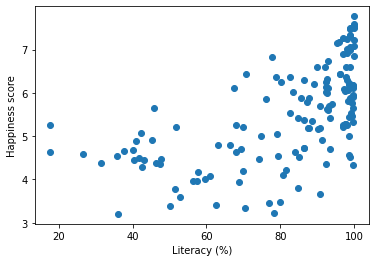

In [15]:
import matplotlib.pyplot as plt

plt.scatter(filtered["Literacy (%)"], filtered["Score"])
plt.xlabel("Literacy (%)")
plt.ylabel("Happiness score")
plt.show()

Proveďme lineární regresi.


In [16]:
from scipy import stats

x=filtered["Literacy (%)"]
y=filtered["Score"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print("slope:", slope)
print("intercept:", intercept)
print("r^2-value", r_value ** 2)
print("p-value:", p_value)
print("std-err:", std_err)

print()

trust = 0.05
print(f"p < {trust}:", p_value < trust)

slope: 0.0312132872760611
intercept: 2.9365766588200355
r^2-value 0.3526313926951669
p-value: 2.79229136717134e-15
std-err: 0.003524305884001723

p < 0.05: True


Ještě před interpretací si vizualizujme výsledky lineární regrese.


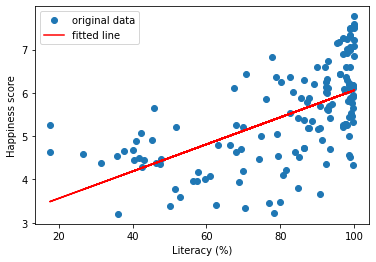

In [17]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("Literacy (%)")
plt.ylabel("Happiness score")
plt.legend()
plt.show()

## Interpretace výsledků

Všimněme si, že při volbě hladiny významnosti 5% lze považovat výsledky za věrohodné.

$R^2 \doteq 0.37$, tudíž pomocí gramotnosti populace jsme schopni alespoň částečně odhadnout štěstí populace.
